LOADING THE LIBRARIES

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.text import TextCollection
from nltk import text
from numpy.linalg import svd
import pandas
import string
import numpy as np
import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Revathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Revathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Revathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LOADING THE DATASET

In [21]:
documentA = open("C:/Users/Revathi/imdb dataset.txt", encoding="utf-8").read()

In [22]:
#vocab = set(word_tokenize(documentA) + word_tokenize(documentB) + word_tokenize(documentC) + word_tokenize(documentD) + word_tokenize(documentE) + word_tokenize(documentF) + word_tokenize(documentG))
vocab = sorted(set(word_tokenize(documentA)))
print("{:} words: {}".format(len(vocab), vocab))

4253 words: ['!', '&', "'", "''", "'30s/'40s", "'80s", "'Harvey", "'Mickey", "'Mrs", "'Raincoat", "'another", "'d", "'dream", "'feel", "'forbidden", "'hot", "'ll", "'m", "'prince", "'re", "'s", "'ve", '(', ')', '+', ',', '-', '--', '-scenes', '.', '..', '...', '.22', '.Every', '.Ferrell', '.I', '.The', '.This', '.i', '.so', '.thats', '/', '/10', '007', '1', '10', '12', '13', '15', '18th', '1950s', '1960s', '1983', '1987', '1993', '1994', '1996', '1997', '1998', '1999', '1M', '1st', '2', '2*', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2008', '25', '2:37', '2nd', '3', '30', '4.7', '45', '4:30pm', '5', '50', '55', '6', '60', '64', '6:30pm', '7', '70', '8', '80', '80s', '85', ':', ';', '>', '?', 'A', 'ACCIDENTALLY', 'AIR', 'ALLEN', 'AND', 'ANOTHER', 'Aamir', 'Ab', 'Abound', 'Academy', 'Acting', 'Actually', 'Adam', 'Addiction', 'Additionally', 'African', 'After', 'Agashe', 'Age', 'Aishwarya', 'Aksar', 'Albeniz', 'Albert', 'Aldridge', 'Allen', 'Allen.I', 'Almost', 'Along', 'Alps

PREPROCESSING

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
documentA = "".join([ch for ch in documentA if ch not in string.punctuation])

In [25]:
documentA = word_tokenize(documentA.lower())

In [26]:
with open('C:/Users/Revathi/stopwords for reviews.txt', encoding="utf8") as file:
    stopwords = file.read()

In [27]:
documentA = [word for word in documentA if word not in stopwords]

In [28]:
lemmatizer = WordNetLemmatizer() # class object
documentA = [lemmatizer.lemmatize(word) for word in documentA] 

In [29]:
print("Document A: {:2d} words —\t{}".format(len(documentA), documentA))

Document A: 9693 words —	['reviewer', 'mentioned', 'watching', 'episode', 'hooked', 'right', 'exactly', 'happened', 'methe', 'thing', 'struck', 'brutality', 'unflinching', 'scene', 'violence', 'right', 'word', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'violence', 'hardcore', 'classic', 'wordit', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'awayi', 'would', 'main', 'appeal', 'show', 'due', 'fact', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'doesnt', 'mess', 'around', 'episode', 'saw

In [31]:
documentA

['reviewer',
 'mentioned',
 'watching',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'thing',
 'struck',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'right',
 'word',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'violence',
 'hardcore',
 'classic',
 'wordit',
 'called',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'city',
 'home',
 'manyaryans',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'far',
 'awayi',
 'would',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'show',
 'wouldnt',
 'dare',
 'forget',
 'pretty',
 'picture',
 'painted',
 'mainstream',
 'audience',
 'forget',
 'charm',


In [32]:
#vocab = set(word_tokenize(documentA) + word_tokenize(documentB) + word_tokenize(documentC) + word_tokenize(documentD) + word_tokenize(documentE) + word_tokenize(documentF) + word_tokenize(documentG))
vocab = sorted(set(documentA))
print("{:} words: {}".format(len(vocab), vocab))

3477 words: ['70', 'ability', 'abort', 'abound', 'absent', 'abstract', 'absurb', 'absurdity', 'abundance', 'academy', 'accent', 'acclaim', 'accompanied', 'accomplished', 'account', 'accurate', 'accustomed', 'achievement', 'across', 'act', 'acted', 'acting', 'action', 'actionlevel', 'actor', 'actress', 'actual', 'actually', 'adam', 'add', 'added', 'addiction', 'adding', 'additionally', 'adrenaline', 'adrift', 'adroit', 'adult', 'advanced', 'advertising', 'advice', 'advise', 'aesthetic', 'affair', 'affect', 'afloat', 'afraid', 'african', 'afterwards', 'afterwardsi', 'againbad', 'agashe', 'age', 'ageand', 'agenda', 'agent', 'aging', 'ago', 'agony', 'agree', 'agreement', 'agrees', 'air', 'aired', 'airing', 'airship', 'aishwarya', 'aksar', 'ala', 'albeniz', 'albert', 'alcoholic', 'aldridge', 'allen', 'alleni', 'alley', 'allosaurus', 'allow', 'allowing', 'allows', 'allusion', 'almost', 'almostolympian', 'alone', 'along', 'alp', 'already', 'alteration', 'alternative', 'although', 'always', 'a

In [33]:
len(vocab)

3477





CO OCCURENCE MATRIX
To create a co-occurrence matrix, we go through a body of text setting a window size around each word.
we then keep track of which words appear in that window.





In [34]:
# Co-occurence matrix: Number of time n words appear together in the corpus.
# Windows size: Define how far from the curent word to be checked for co-occurence.

def co_occurrence(sentences, vocab, window_size):
    d = collections.defaultdict(int)
    for sentence in sentences:
        # iterate over sentences
        for i in range(len(sentence)):
            token = sentence[i]
            next_token = sentence[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1

    # formulate the dictionary into dataframe
    vocab = sorted(vocab)
    df = pandas.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

In [35]:
# Co-Occurence matrix C(x, y)
sentences = [documentA]
X_1 = co_occurrence(sentences, vocab, window_size=1)
X_2 = co_occurrence(sentences, vocab, window_size=2)
X_3 = co_occurrence(sentences, vocab, window_size=3)
X_4 = co_occurrence(sentences, vocab, window_size=4)



In [36]:
X_1
X_2
X_3
X_4

,70,ability,abort,abound,absent,abstract,absurb,absurdity,abundance,academy,...,year,young,younger,youth,youtube,yuppie,zealand,zealander,zero,zombie
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abort,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abound,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
absent,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abstract,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absurb,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absurdity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abundance,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
academy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0






Singular value decomposition

Singular value decomposition (SVD) is a way to decompose a matrix into some successive approximation.
This decomposition can reveal internal structure of the matrix. 






In [46]:
def singularvaluedecomposition(co_occurence_matrix,limit):
    #  SVD on PMI matrix
    u, s_, vt = svd(co_occurence_matrix.to_numpy())
    # Convert S to diagonal matrix
    s = np.zeros((len(vocab), len(vocab)))
    for i in range(len(s_)):
        s[i, i] = s_[i]
    u = pandas.DataFrame(u, index=vocab)
    s = pandas.DataFrame(s)
    vt = pandas.DataFrame(vt)
    u = u.iloc[:, :limit]
   
    return u

In [84]:
U_1_50 =singularvaluedecomposition(X_1,50)


U_1_50

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
70,-0.002720,-0.002908,-0.002717,-0.001925,-1.303610e-03,-0.004700,-0.001467,-0.000922,0.000541,0.002476,...,0.017201,0.015175,-0.005957,-0.006312,0.013742,0.012054,0.003773,0.008141,-0.006695,0.001432
ability,-0.006359,-0.006106,-0.000872,0.001872,-4.423951e-03,-0.010655,-0.031864,-0.029127,0.015818,0.022203,...,-0.007250,0.003197,-0.015550,-0.010219,-0.000058,-0.009390,-0.006218,-0.000842,-0.000403,-0.000886
abort,-0.000468,-0.000343,-0.001202,-0.001181,4.212490e-04,0.000644,0.002123,-0.001853,0.001146,-0.001532,...,0.000496,0.000344,-0.001689,-0.001067,-0.000634,-0.001479,0.001060,-0.000911,-0.000191,-0.000655
abound,-0.000306,-0.000525,-0.001094,-0.001112,7.254465e-04,-0.000041,-0.000223,0.000272,0.000047,0.000020,...,-0.000246,-0.000347,-0.000218,-0.000358,0.000065,-0.000571,-0.000073,-0.000761,0.000215,-0.000069
absent,-0.000009,-0.000009,0.000005,0.000014,-1.111623e-04,-0.000163,-0.000141,-0.000244,-0.000081,-0.000140,...,0.000152,0.000338,-0.000368,0.000080,-0.000103,0.000167,-0.000070,0.000359,0.000357,-0.000144
abstract,-0.000189,0.000059,0.000158,-0.000212,-1.594493e-03,0.001935,-0.000181,-0.001473,-0.002256,0.003537,...,-0.002195,0.002854,-0.001835,0.001828,-0.000953,0.002547,-0.000032,-0.003357,-0.003268,-0.001191
absurb,-0.000065,0.000071,0.000077,-0.000044,1.152579e-05,-0.000253,-0.000213,-0.000063,-0.000023,0.000233,...,0.000823,-0.000482,-0.000176,0.000117,-0.001899,0.000172,0.000352,-0.000233,0.000804,0.001312
absurdity,-0.000050,0.000091,-0.000042,0.000093,1.345092e-04,-0.000006,0.000061,0.000027,-0.000318,-0.000012,...,0.000881,-0.000310,0.000819,-0.000170,0.000709,-0.000639,0.000340,0.000558,-0.000037,-0.000390
abundance,-0.000481,-0.000349,0.001053,0.000934,7.498866e-04,-0.000641,0.000325,0.000130,0.000206,0.000454,...,-0.000169,-0.002191,-0.002851,-0.004207,0.002667,-0.003049,0.001003,0.003893,-0.001283,0.000348
academy,-0.000119,0.000052,-0.000186,0.000055,-4.047516e-04,-0.000091,0.000183,-0.000424,-0.000075,0.000565,...,-0.001676,-0.002996,-0.003177,-0.004366,0.003315,-0.001761,0.000716,0.003630,-0.000862,0.000297


In [127]:
U_1_100 =singularvaluedecomposition(X_1,100)
U_1_200 =singularvaluedecomposition(X_1,200)
U_1_300 =singularvaluedecomposition(X_1,300)4
U_1_300

u shape is (3462, 100)
u shape is (3462, 200)
u shape is (3462, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ability,-0.006222,0.006124,-0.000679,-0.001499,-0.004131,-0.011807,-0.030372,-0.027924,0.017806,2.341165e-02,...,0.023461,-0.011235,0.003451,0.017411,-0.000408,-0.003165,0.005102,-0.013927,-0.046185,0.014878
abort,-0.000463,0.000346,-0.001188,0.001156,0.000438,0.000708,0.002069,-0.001754,0.001272,-1.599958e-03,...,-0.008108,0.006348,0.003831,0.006834,0.001520,-0.000009,-0.008198,-0.003120,0.032759,-0.002415
abound,-0.000305,0.000529,-0.001090,0.001105,0.000723,-0.000054,-0.000183,0.000285,0.000027,5.000544e-05,...,0.000125,0.000358,0.001980,0.005256,0.001771,-0.001722,-0.001057,-0.000058,0.008128,0.000635
absent,-0.000009,0.000009,0.000006,-0.000014,-0.000110,-0.000163,-0.000144,-0.000244,-0.000067,-1.462094e-04,...,-0.000610,-0.004012,-0.001688,0.003554,0.000245,0.000389,0.002012,0.004609,-0.008069,-0.001780
abstract,-0.000188,-0.000058,0.000162,0.000215,-0.001580,0.001861,-0.000041,-0.001560,-0.002204,3.713049e-03,...,0.007808,0.014747,-0.008012,0.011371,-0.001141,0.002367,-0.007461,0.022714,0.023916,-0.010879
absurb,-0.000065,-0.000072,0.000077,0.000045,0.000010,-0.000264,-0.000189,-0.000055,-0.000016,2.401118e-04,...,0.001300,-0.001949,0.000799,0.003517,-0.000226,-0.000383,0.001961,-0.001202,-0.008262,-0.002117
abundance,-0.000480,0.000348,0.001049,-0.000934,0.000727,-0.000618,0.000368,0.000150,0.000211,3.465017e-04,...,-0.002765,-0.000649,0.000857,0.023937,0.002292,-0.008277,-0.010254,0.000508,0.000417,0.010751
academy,-0.000119,-0.000055,-0.000186,-0.000056,-0.000419,-0.000087,0.000223,-0.000431,-0.000048,4.489441e-04,...,-0.012158,-0.010046,0.000076,0.012381,0.002579,-0.005424,-0.004267,0.009695,0.021780,0.001266
accent,-0.002891,-0.000099,-0.002719,0.003865,-0.012657,0.013210,0.002020,-0.005342,0.000766,-3.556316e-03,...,-0.039121,-0.068821,-0.014739,-0.023131,0.009995,-0.001392,-0.028476,0.026371,0.043395,0.001768
acclaim,-0.000585,-0.000588,-0.000403,-0.000444,-0.001188,-0.000237,0.003635,-0.001848,-0.006299,7.248069e-03,...,0.003355,-0.024184,-0.010995,-0.009722,-0.006305,-0.001982,0.005632,0.004963,-0.000429,-0.015648


In [ ]:
U_2_50 =singularvaluedecomposition(X_2,50)
U_2_100=singularvaluedecomposition(X_2,100)
U_2_200=singularvaluedecomposition(X_2,200)
U_2_300=singularvaluedecomposition(X_2,300)

In [ ]:
U_3_50 =singularvaluedecomposition(X_3,50)
U_3_100=singularvaluedecomposition(X_3,100)
U_3_200=singularvaluedecomposition(X_3,200)
U_3_300=singularvaluedecomposition(X_3,300)

In [ ]:
U_4_50 =singularvaluedecomposition(X_4,50)
U_4_100=singularvaluedecomposition(X_4,100)
U_4_200=singularvaluedecomposition(X_4,200)
U_4_300=singularvaluedecomposition(X_4,300)

In [48]:
def pca1(u):
    u1=u.to_numpy()
    pca = PCA(2)
    # fit on data
    pca.fit(u1)
    B = pca.transform(u1)
    B= pandas.DataFrame(B)
    print('shape',B.shape)
    return B

In [49]:
p_1_50 =pca1(U_1_50)

shape (3477, 2)





PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized
for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. 
It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts
with fewer variation.
One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on
the feature correlation between them without any supervision (or labels)



In [59]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
U_1_50 = pca.fit_transform(U_1_50)
p_1_50 = pd.DataFrame(data = U_1_50
             , columns = ['principal component 1', 'principal component 2'],index=vocab)

In [60]:
p_1_50

,principal component 1,principal component 2
70,-0.002807,-0.003283
ability,0.001460,0.003401
abort,-0.001632,0.001557
abound,-0.000112,-0.000259
absent,-0.000221,0.000234
abstract,0.000114,-0.000021
absurb,-0.000134,0.000568
absurdity,0.000234,0.000033
abundance,-0.001419,-0.000859
academy,-0.001593,-0.001135


In [68]:
u=p_1_50.sample(100)

In [69]:
u

,principal component 1,principal component 2
factor,-0.003810,0.007154
make,0.320442,-0.121449
plot,-0.128032,0.171994
language,-0.001117,0.005370
suddenly,0.010514,-0.009910
away,-0.020755,0.019640
lds,0.000237,0.000175
jerkoff,-0.012385,0.001307
maker,0.000153,0.014147
sizzling,0.001454,-0.002169


In [131]:
U_1_50.sample(n=100, frac=None, replace=False, weights=None, random_state=100, axis=None)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
overwhelmed,-1.676321e-03,2.109060e-03,3.886794e-03,-4.673930e-03,-0.001600,0.007132,-0.002583,7.203250e-03,0.001099,-0.000354,...,0.010271,0.013104,-0.000693,-0.000222,0.009485,-0.005917,-0.009531,-0.012275,0.005879,0.002430
racial,-1.795644e-03,1.898171e-03,4.183078e-03,-4.399353e-03,0.002132,-0.000051,-0.000517,-8.494027e-04,-0.000207,0.001758,...,0.002554,0.001765,-0.005555,0.001129,-0.001490,0.004480,0.006400,-0.001221,0.000867,-0.003614
across,-6.971887e-03,7.443968e-03,1.193982e-02,-8.970393e-03,0.004394,-0.009305,0.003930,8.710687e-03,-0.008969,0.001911,...,0.027799,-0.009637,0.010485,-0.003603,0.010406,0.022354,-0.006276,0.006899,-0.013654,0.015782
versace,-2.835204e-07,1.479689e-07,3.247746e-07,2.130806e-07,-0.000012,0.000002,0.000004,-1.868326e-05,-0.000019,0.000031,...,-0.000005,0.000058,-0.000070,-0.000059,0.000101,0.000058,0.000099,0.000119,0.000040,0.000061
premise,-1.398430e-03,-2.247628e-04,8.187854e-04,-1.176650e-03,-0.002310,0.002814,0.007494,-5.777399e-03,-0.016919,0.010579,...,0.012272,0.008586,-0.005820,-0.012117,0.003222,0.005825,0.018465,0.008866,0.010309,0.009543
foretold,-7.199182e-04,1.069362e-03,-1.471213e-04,7.061057e-05,0.001329,-0.000019,0.000302,7.642610e-04,-0.000182,0.000561,...,-0.001541,0.004051,0.001167,0.004457,-0.004265,0.001887,0.000160,0.002982,0.002289,0.000740
faint,-2.545407e-03,4.783345e-04,1.487478e-03,-8.347330e-04,-0.002491,-0.000002,-0.005728,4.348443e-04,-0.003509,-0.001461,...,0.002164,0.007279,0.011517,0.013508,0.006202,0.005628,0.013938,-0.001167,0.005541,-0.004390
taped,-2.956349e-03,3.099901e-03,7.603918e-03,-6.779933e-03,-0.001120,-0.002738,-0.000243,1.629114e-03,-0.005402,-0.004401,...,-0.025340,-0.012592,-0.007457,0.032447,0.031759,-0.000057,0.015395,-0.038904,-0.007671,-0.031661
dialogue,-9.943744e-03,9.741400e-03,-1.142737e-03,-4.602425e-03,0.003081,-0.007638,-0.002847,5.652166e-04,-0.008770,-0.006418,...,0.000573,-0.002621,0.002299,-0.028888,-0.023470,-0.018916,0.006773,0.013905,0.000352,0.002724
animation,-1.263270e-02,-1.549675e-02,-2.504304e-02,-2.252497e-02,0.009015,0.001948,-0.004830,2.876646e-03,-0.000579,-0.001551,...,-0.007663,-0.003930,0.000561,0.002652,-0.002161,-0.008632,-0.001319,0.002648,0.010106,-0.001810


In [52]:
model={}
c=0
for i in list(U_1_50.index):
    model[i]=list(U_1_50.loc[i])
    c=c+1

In [53]:
model

{'70': [-0.002720094179737724,
  -0.002907699650653347,
  -0.0027170414666741957,
  -0.0019249401463093743,
  -0.001303609695584516,
  -0.0046999388223752,
  -0.001467276117597587,
  -0.0009222405571904461,
  0.0005411903386727465,
  0.002475832440237401,
  -0.0007943351756013492,
  -0.0041824516215549536,
  -0.0020920587044351256,
  -0.004563523796459908,
  0.0011668229962447322,
  0.0022885414552101056,
  0.0037614151901590384,
  0.004647495911444581,
  0.008957892049408327,
  0.0035970887678778464,
  -0.005160946900056376,
  -0.0005103799209475869,
  -0.008135918388910049,
  -0.0001107327115868296,
  0.0009763144798883485,
  0.0012521590945257614,
  -0.005891286564634651,
  -0.014501036704317134,
  -0.00525012862628269,
  -0.005426572428852611,
  0.010151157396329102,
  0.012551961847362701,
  0.0015272297316101012,
  0.009371179566440818,
  0.007197810140448572,
  0.016520566288768163,
  0.012977342558821797,
  0.0037299925235657807,
  -0.020154384230141605,
  -0.010575255888105158

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline


def pca_plot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='b', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()
        

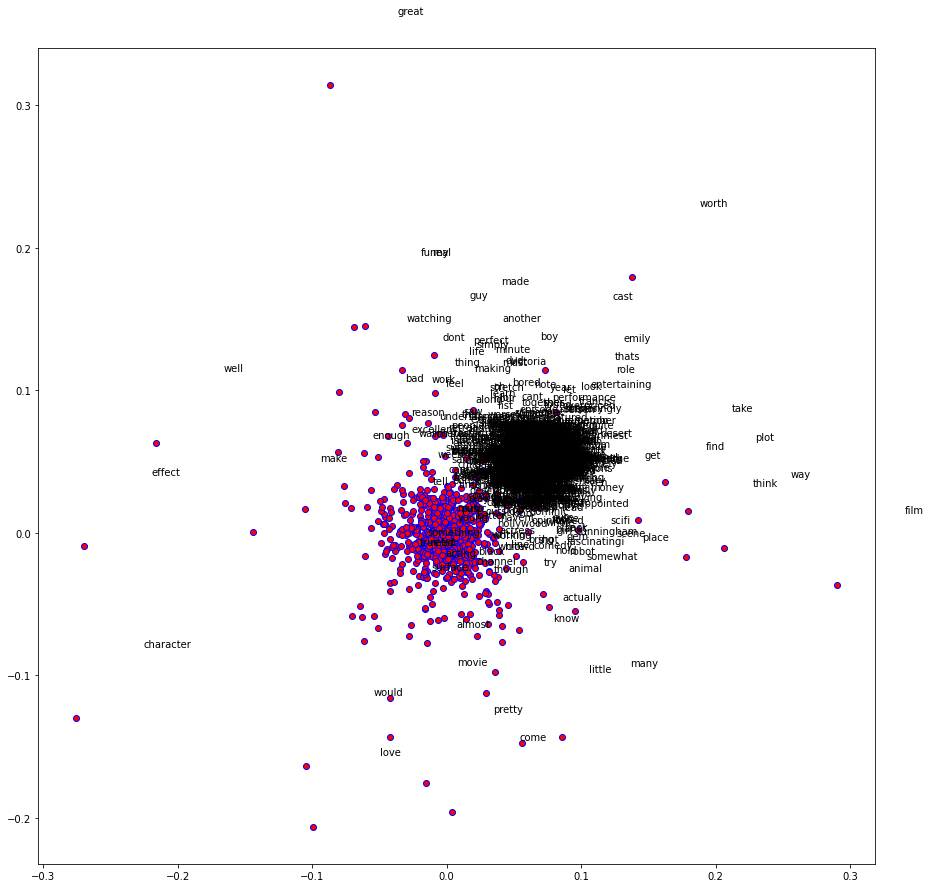

In [55]:

pca_plot(model,list(U_1_50.index))

In [58]:
import plotly.express as px
def ploting(ran_list,pca_frame,vocab):
    pca_frame['words']=vocab
    pca_frame=pca_frame.iloc[ran_list,:]
    fig = px.scatter(pca_frame,x=0,y=1,text='words')
    fig.show()
    return


import random

n = random.sample(range(0, 3462), 100)

ploting(n,p_1_50,vocab)

In [78]:
model={}
c=0
for i in list(p_1_50.index):
    model[i]=list(p_1_50.loc[i])
    c=c+1

In [79]:
model

{'70': [-0.0032828454667750717, -0.0028067333112984376, '70'],
 'ability': [0.0034012772510206312, 0.001459803341650978, 'ability'],
 'abort': [0.0015568842218414234, -0.0016321098837077943, 'abort'],
 'abound': [-0.0002587270779475762, -0.00011220789199288799, 'abound'],
 'absent': [0.00023375467890730516, -0.0002207783078646941, 'absent'],
 'abstract': [-2.087399261550311e-05, 0.00011417692049054942, 'abstract'],
 'absurb': [0.0005679141754230332, -0.00013365272581084627, 'absurb'],
 'absurdity': [3.2854608255402786e-05, 0.00023409588023914194, 'absurdity'],
 'abundance': [-0.0008591618758150857, -0.001419197126356484, 'abundance'],
 'academy': [-0.0011352470171709086, -0.0015925407592882355, 'academy'],
 'accent': [0.017321056289148467, -0.006056126038024835, 'accent'],
 'acclaim': [0.0028387594625597324, 0.0008352171211241313, 'acclaim'],
 'accompanied': [-0.0014682819455933936,
  -0.0010599991988565443,
  'accompanied'],
 'accomplished': [0.0005879259517088944,
  0.002970535601807

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline


def pca_plot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='b', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()
        

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline


def pca_plot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='b', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()
        

In [70]:
model={}
c=0
for i in list(p_1_50.index):
    model[i]=list(p_1_50.loc[i])
    c=c+1

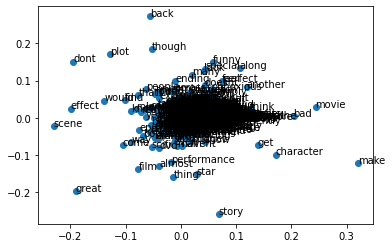

In [71]:
#from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
P_1_50 = pca.fit_transform(U_1_50)
# create a scatter plot of the projection
pyplot.scatter(P_1_50[:, 0], P_1_50[:, 1])
words = list(model)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(P_1_50[i, 0], P_1_50[i, 1]))
pyplot.show()

        


In [72]:
model={}
c=0
for i in list(u.index):
    model[i]=list(u.loc[i])
    c=c+1

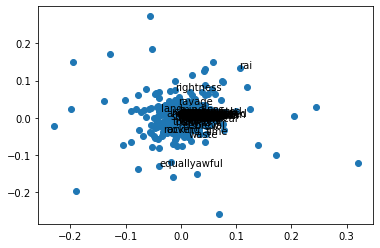

In [73]:
#from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
P_1_50 = pca.fit_transform(U_1_50)
# create a scatter plot of the projection
pyplot.scatter(P_1_50[:, 0], P_1_50[:, 1])
words = list(model)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(P_1_50[i, 0], P_1_50[i, 1]))
pyplot.show()